# Networkx Tutorial

Reference: https://networkx.org/documentation/stable/index.html

NetworkX is a Python package for the creation, manipulation, and study of the structure, dynamics, and functions of complex networks. It provides tools for the study of the structure and dynamics of social, biological, and infrastructure networks.

In [1]:
# pip install networkx
import networkx as nx

### Basic concepts

>Creating a graph

A graph is a collection of nodes along with identified pairs of nodes (edges). In NetworkX, nodes can be almost any object such as a string, an image, an XML object, another Graph, a customized object, etc.

In [2]:
G = nx.Graph()

>Adding nodes

In [3]:
G.add_node(1) #add one node at a time
G.add_nodes_from([2,3]) #add nodes from any iterable container
G.add_nodes_from([(4,{'color':'red', 'size':2}),(5,{'color':'green', 'size':5})]) #add nodes along with node attributes using the form (node, node_attribute_dict)

>Adding Edge

In [4]:
G.add_edge(1,2) #adding one edge at a time
G.add_edges_from([(1,2),(1,3)]) #adding a list of edges

> Getting basic attributes from a graph

In [5]:
print(G.number_of_nodes())
print(G.number_of_edges())
print(G.adj)
print(G.nodes)
print(G.edges)
print(G.degree)
print(list(G.neighbors(1)))

5
2
{1: {2: {}, 3: {}}, 2: {1: {}}, 3: {1: {}}, 4: {}, 5: {}}
[1, 2, 3, 4, 5]
[(1, 2), (1, 3)]
[(1, 2), (2, 1), (3, 1), (4, 0), (5, 0)]
[2, 3]


> Removing nodes & edges

In [6]:
G.remove_node(4)
G.remove_nodes_from([5,4])
list(G.nodes)

[1, 2, 3]

In [7]:
G.remove_edge(1,2)
G.remove_edges_from([(1,2),(4,5)])
G.edges

EdgeView([(1, 3)])

Graph objects do not have to be built up incrementally - data specifying graph structure can be passed directly to the constructors of the various graph classes.

In [8]:
# sample approach 1: create a graph from a given edge list
edgelist = [(0, 1), (1, 2), (2, 3)]
H = nx.Graph(edgelist)
list(H.edges())
# sample approach 2: create a Graph dict mapping nodes to nbrs
adjacency_dict = {0: (1, 2), 1: (0, 2), 2: (0, 1)}
H = nx.Graph(adjacency_dict)
list(H.edges())

[(0, 1), (0, 2), (1, 2)]

> Adding attributes to graphs, nodes, and edges

In [9]:
# Graph-level attribute
G = nx.Graph(day="Friday", year=2024)
print(G.graph)
G.graph['day']="Tuesday"
print(G.graph)

{'day': 'Friday', 'year': 2024}
{'day': 'Tuesday', 'year': 2024}


In [10]:
# Node-level attribute
G.add_node(1, time='1pm')
G.add_nodes_from([(2,{"time":"2pm"}),(3,{"time":"3pm"})])
G.nodes.data()

NodeDataView({1: {'time': '1pm'}, 2: {'time': '2pm'}, 3: {'time': '3pm'}})

In [11]:
# Edge-level attribute (creating weighted graphs)
G.add_edge(1, 2, weight=4.7 )
G.add_edges_from([(3, 4), (4, 5)], color='red')
G.add_edges_from([(1, 2, {'color': 'blue'}), (2, 3, {'weight': 8})])
G[1][2]['weight'] = 4.7
G.edges[3, 4]['weight'] = 4.2
G.edges.data()

EdgeDataView([(1, 2, {'weight': 4.7, 'color': 'blue'}), (2, 3, {'weight': 8}), (3, 4, {'color': 'red', 'weight': 4.2}), (4, 5, {'color': 'red'})])

> Accessing edges and neighbors

In [12]:
G = nx.Graph([(1, 2, {"color": "yellow"})])
print(G[1])
print(G[1][2])
print(G.edges[1,2])
G[1][2]['color']='blue'
print(G.edges[1,2])
#another example
G.add_edge(1, 3)
G[1][3]['color'] = "blue"
G.edges[1, 2]['color'] = "red"
G.edges[1, 2]

{2: {'color': 'yellow'}}
{'color': 'yellow'}
{'color': 'yellow'}
{'color': 'blue'}


{'color': 'red'}

In [13]:
# Fast examination of all (node, adjacency) pairs
G = nx.Graph()
G.add_weighted_edges_from([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])
for n, nbrs in G.adjacency(): #or iterate over G.adj.items()
   for nbr, eattr in nbrs.items():
       wt = eattr['weight']
       if wt < 0.5: print(f"({n}, {nbr}, {wt:.3})")

(1, 2, 0.125)
(2, 1, 0.125)
(3, 4, 0.375)
(4, 3, 0.375)


In [14]:
# access to all edges with the edges property
G.edges.data('weight')

EdgeDataView([(1, 2, 0.125), (1, 3, 0.75), (2, 4, 1.2), (3, 4, 0.375)])

> Special useful graphs: Directed Graphs

In [15]:
DG = nx.DiGraph()
DG.add_weighted_edges_from([(1, 2, 0.5), (3, 1, 0.75), (1, 3, 0.4)])
print(DG.out_degree(1, weight='weight'))
print(DG.out_degree(1))
print(DG.in_degree(1))
H = nx.Graph(DG)  # create an undirected graph H from a directed graph DG
print(H.edges.data()) # You can use DG.to_undirected()

0.9
2
1
[(1, 2, {'weight': 0.5}), (1, 3, {'weight': 0.75})]


> Drawing graphs

Proper graph visualization is hard, and we highly recommend that people visualize their graphs with tools dedicated to that task. Notable examples of dedicated and fully-featured graph visualization tools are Cytoscape, Gephi, Graphviz.

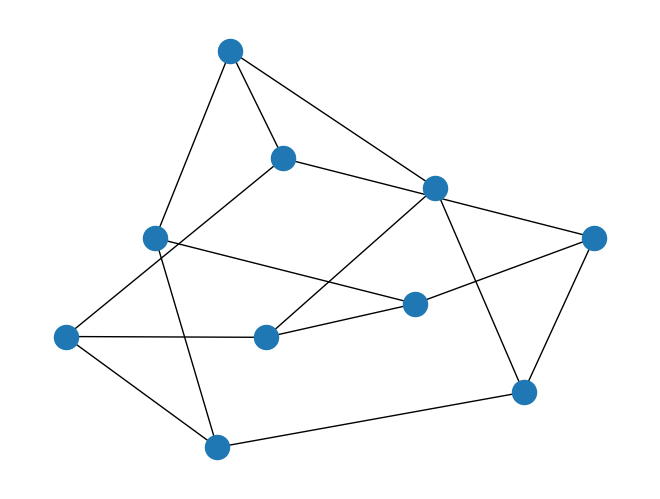

In [16]:
import matplotlib.pyplot as plt
G = nx.petersen_graph()
nx.draw(G, pos=nx.spring_layout(G))  # networkx draw()

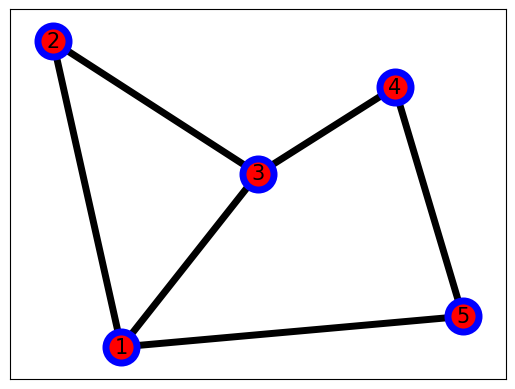

In [17]:
G = nx.Graph()
G.add_edge(1, 2)
G.add_edge(1, 3)
G.add_edge(1, 5)
G.add_edge(2, 3)
G.add_edge(3, 4)
G.add_edge(4, 5)

# explicitly set positions
pos = {1: (0, 0), 2: (-1, 0.3), 3: (2, 0.17), 4: (4, 0.255), 5: (5, 0.03)}

options = {
    "font_size": 15,
    "node_size": 500,
    "node_color": "red",
    "edgecolors": "blue",
    "linewidths": 5,
    "width": 5,
}
nx.draw_networkx(G, pos, **options)

We have full control over nodes and edges visualization:

{('a', 'b'): Text(-0.7681487567110847, 0.3618072550923697, '0.6'),
 ('a', 'c'): Text(-0.05228636436497752, 0.06078533445996674, '0.2'),
 ('a', 'd'): Text(-0.5138611902635294, -0.10295220830144139, '0.3'),
 ('c', 'd'): Text(-0.029850041206337413, -0.24132784146632047, '0.1'),
 ('c', 'e'): Text(0.6154848791443639, -0.2781469565309216, '0.7'),
 ('c', 'f'): Text(0.6142387034652727, 0.08007724419996018, '0.9')}

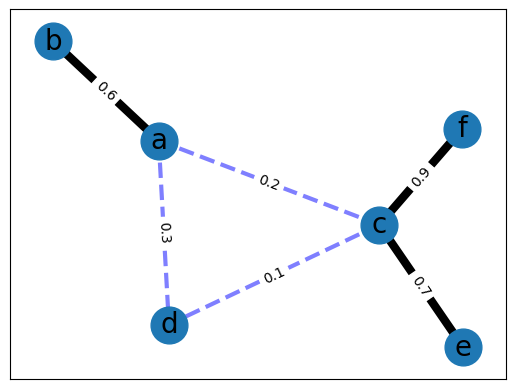

In [18]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 0.5]

pos = nx.spring_layout(G, seed=7)  # positions for all nodes - seed for reproducibility

# nodes
nx.draw_networkx_nodes(G, pos, node_size=700)

# edges
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
nx.draw_networkx_edges(
    G, pos, edgelist=esmall, width=3, alpha=0.5, edge_color="b", style="dashed"
)

# node labels
nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")
# edge weight labels
edge_labels = nx.get_edge_attributes(G, "weight")
nx.draw_networkx_edge_labels(G, pos, edge_labels)

> Creating classic small graphs

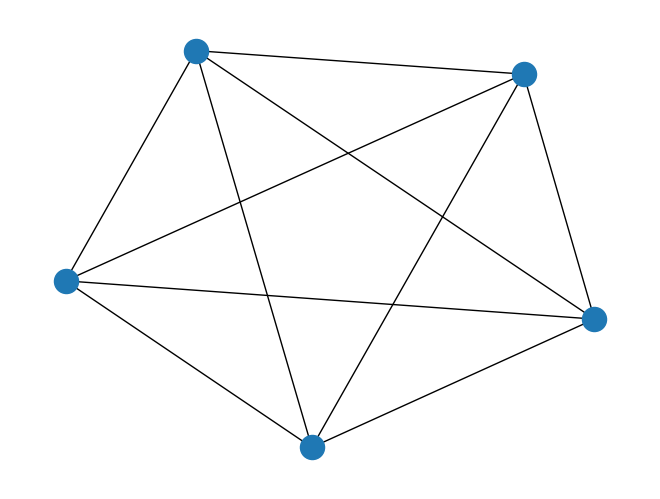

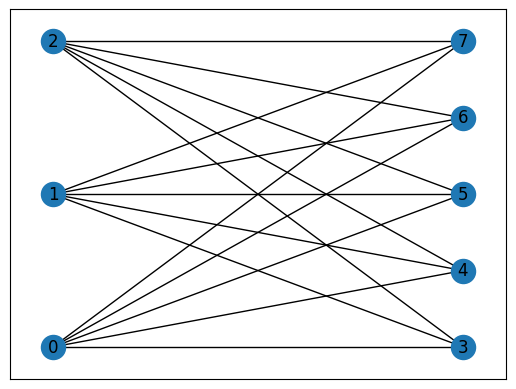

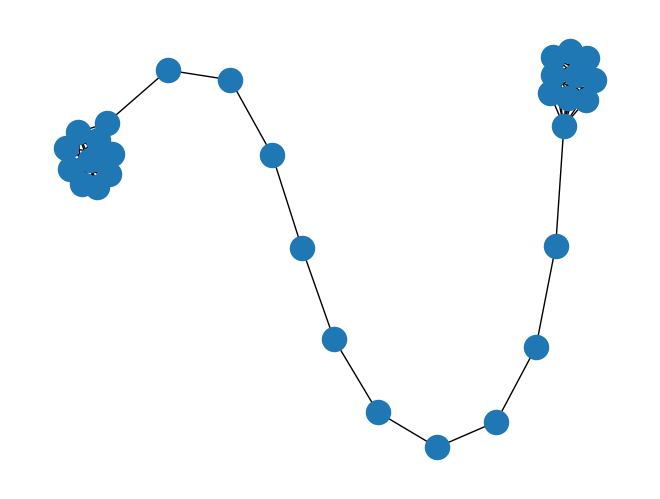

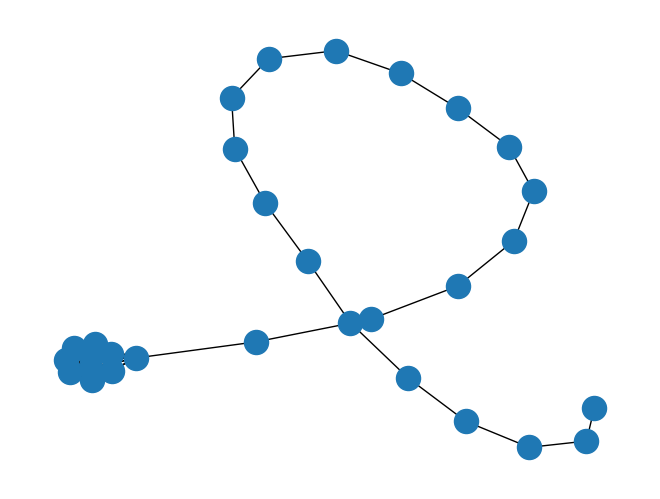

In [19]:
K_5 = nx.complete_graph(5)
nx.draw(K_5)

plt.figure()
K_3_5 = nx.complete_bipartite_graph(3, 5)
nx.draw_networkx(K_3_5, pos=nx.bipartite_layout(K_3_5,nx.bipartite.sets(K_3_5)[0]))

plt.figure()
barbell = nx.barbell_graph(10, 10) #two complete graphs connected by a path.
nx.draw(barbell)

plt.figure()
lollipop = nx.lollipop_graph(10, 20)
nx.draw(lollipop)

In [20]:
#stochastic graphs

er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

### Some algorithmic aspects available in networkx

> Euler's Algorithm

**Can you draw a given graph without lifting your pen or crossing on a line more than once?**

If you can, it means there is an Euler Path in the graph. If this path starts and ends at the same blue circle, it is called an Euler Circuit.

It is useful for garbage collections, airplane pilots, GPS developers (e.g. Google Maps developers).


NetworkX implements several methods using the Euler’s algorithm. These are:

- is_eulerian : Whether the graph has an Eulerian circuit

- eulerian_circuit : Sequence of edges of an Eulerian circuit in the graph.

- is_semieulerian : Whether the graph has an Eulerian path but not an Eulerian circuit.

- has_eulerian_path: Whether the graph has an Eulerian path.

- eulerian_path : Sequence of edges of in Eulerian path in the graph.

True
[(0, 4), (4, 2), (2, 3), (3, 0), (0, 2), (2, 1), (1, 0)]


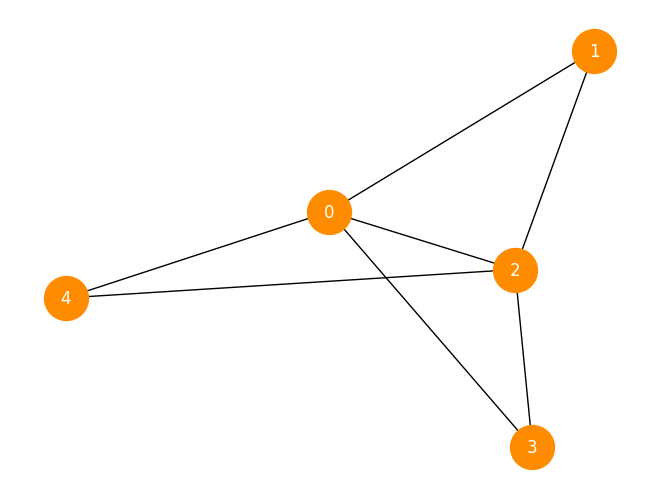

In [21]:
# Euler’s Algorithm

T = nx.Graph([(0, 1), (0, 2), (0, 3), (0, 4), (1, 2), (2, 3), (2, 4)])
nx.draw(
    T, with_labels=True, node_size=1000, font_color="White", node_color="darkorange"
)

print(nx.is_eulerian(T))
print(list(nx.eulerian_circuit(T)))

> Isomorphism Algorithms

Two graphs are isomorphic if they have the same number of edges, vertices, and same edges connectivity.

Isomorphism Algorithms in Networkx:
- nx.faster_could_be_isomorphic(G, H): returns True if G and H have the same degree secuence.
- nx.fast_could_be_isomorphic(G,H): returns true if the graphs have the same degree and triangle sequence
- nx.could_be_isomorphic(G, H): returns True if the graphs have the same degree, triangle, and clique sequence. 
- is_isomorphic(G,H): Implemented the advanced recursive VF2 algorithm.

In [22]:
G = nx.path_graph(5)
G.add_edge(2, 5)

H = nx.path_graph(5)
H.add_edge(3, 5)

nx.is_isomorphic(G, H)

False

> Directed Acyclic Graphs

Directed acyclic graphs representations of partial orderings have many applications in scheduling of systems of tasks with ordering constraints. 

- nx.is_directed_acyclic_graph(G)
- nx.find_cycle(G)
- Topological sorting: nx.topological_generations(G). This is important for scheduling a sequence of jobs or tasks based on their dependencies.

> Shortest paths algorithms

Compute the shortest paths and path lengths between nodes in the graph.

In [23]:
G = nx.path_graph(5)
print(nx.shortest_path(G, source=0, target=4))
print([p for p in nx.all_shortest_paths(G, source=0, target=2)])
print(nx.shortest_path_length(G, source=0, target=4))
print(nx.has_path(G, source=0, target=3))


[0, 1, 2, 3, 4]
[[0, 1, 2]]
4
True
